데이터 파일 다운로드: https://drive.google.com/drive/folders/0B98qpkK5EJemYnJ1ajA1ZVJwMzg

# 1장. 탐색적 데이터 분석

In [3]:
import pandas as pd
import numpy as np
from scipy import stats 
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sn

def weighted_median(df, val, weight):
    df_sorted = df.sort_values(val)
    cumsum = df_sorted[weight].cumsum()
    cutoff = df_sorted[weight].sum() / 2.
    return df_sorted[cumsum >= cutoff][val].iloc[0]

In [2]:
df_state = pd.read_csv('psds_data/state.csv')

## 1.3 위치 추정
- 평균(mean): 모든 값의 총합을 개수로 나눈 값 (유의어: average)
- 가중평균(weighted mean): 가중치를 곱한 값의 총합을 가중치의 총합으로 나눈 값 (유의어: weighted average)
- 중간값(median): 데이터에서 가장 가운데 위치한 값 (유의어: 50번째 백분위수 percentitle)
- 가중 중간값(weighted median): 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
- 절사평균(trimmed mean): 정해진 개수의 극단값을 제외한 나머지 값들의 평균 (유의어: 절단평균(truncated mean))
- 로버스트하다(robust): 극단값들에 민감하지 않다는 것을 의미한다. (유의어: 저항성 있다(resistant))
- 특잇값(outlier): 대부분의 값과 매우 다른 데이터 값 (유의어: 극단값)

In [16]:
# 평균
df_state['Population'].mean()

6162876.3

In [17]:
# 절사평균
stats.trim_mean(df_state['Population'], 0.1)

4783697.125

In [18]:
# 중간값
df_state['Population'].median()

4436369.5

In [19]:
# 가중평균
np.average(df_state['Murder.Rate'], weights=df_state['Population'])

4.445833981123393

In [20]:
# 가중 중간값
weighted_median(df_state, 'Murder.Rate', 'Population')

4.4

## 1.4 변이 추정
- 편차(deviation): 관측값과 위치 추정값 사이의 차이 (유의어: 오차, 잔차)
- 분산(variance): 평균과의 편차를 제곱한 값들의 합을 n-1로 나눈 값, n은 데이터 개수 (유의어: 평균제곱오차)
- 표준편차(standard deviation): 분산의 제곱근 (유의어: I1 노름(norm), 유클리드 노름)
- 평균절대편차(mean absolute deviation): 평균과의 편차의 절댓값의 평균 (유의어:I2 노름, 맨하탄 노름)
- 중간값의 중위절대편차(median absolute deviation from the median): 중간값과의 편차의 절댓값의 중간값
- 범위(range): 데이터의 최댓값과 최솟값의 차이
- 순서통계량(order statistics): 최소에서 최대까지 정렬된 데이터 값에 따른 계량형 (유의어: 순위)
- 백분위수(percentile): 어떤 값들의 p퍼센트가 이 값 혹은 더 작은 값을 갖고, (100-p)퍼센트가 이 값 혹은 더 큰 값을 갖도록 하는 값 (유의어: 분위수)
- 사분위범위(interquartile range): 75번째 백분위수와 25번째 백분위수 사이의 차이 (유의어 IQR)

In [29]:
# 표준편차
df_state['Population'].std()

6848235.347401142

In [28]:
# IQR(사분위 범위)
df_state['Population'].quantile(q=0.75) - df_state['Population'].quantile(q=0.25)

4847308.0

In [30]:
# 평균절대편차
df_state['Population'].mad()

4450933.356000001

In [4]:
# 중위절대편차
pg.mad(df_state['Population'])

3849876.1459979336

## 1.5 데이터 분포 탐색하기
- 상자그림(boxplot): 투키가 데이터의 분포를 시각화하기 위한 간단한 방법으로 소개한 그림 (유의어: 상자 수염도)
- 도수분포표(frequency table): 어떤 구간(interval, bin)에 해당하는 수치 데이터 값들의 빈도를 나타내는 기록
- 히스토그램(histogram): x축은 구간들을, y축은 빈도수를 나타내는 도수 테이블의 그림
- 밀도 그림(density plot): 히스토그램을 부드러운 곡선으로 나타낸 그림. 커널밀도추정(kernel density estimation)을 주로 사용한다.

In [5]:
df_state['Murder.Rate'].describe()

count    50.000000
mean      4.066000
std       1.915736
min       0.900000
25%       2.425000
50%       4.000000
75%       5.550000
max      10.300000
Name: Murder.Rate, dtype: float64

In [6]:
df_state['Murder.Rate'].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

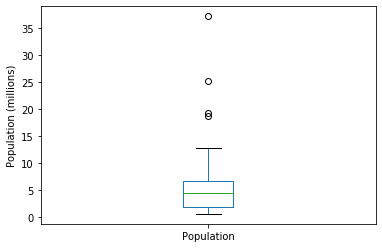

In [22]:
# 상자그림
ax = (df_state['Population'] / 1000000).plot(kind='box')
ax.set(ylabel='Population (millions)');

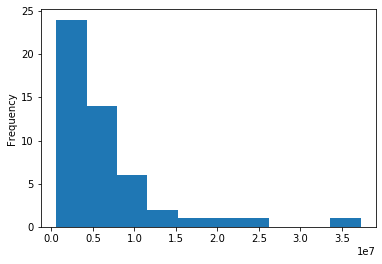

In [45]:
df_state['Population'].plot.hist();

[24. 14.  6.  2.  1.  1.  1.  0.  0.  1.] [  563626.  4232659.  7901692. 11570725. 15239758. 18908791. 22577824.
 26246857. 29915890. 33584923. 37253956.] <a list of 10 Patch objects>


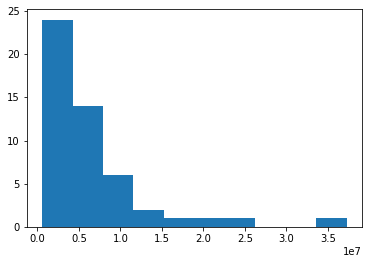

In [29]:
n, bins, patches = plt.hist(df_state['Population'], bins=10)
print(n, bins, patches)

In [32]:
idx = []
for i in range(0, len(bins)-1):
    k = "%0.1f~%0.1f" % (bins[i], bins[i+1])
    idx.append(k)
idx
pd.DataFrame(n, index=idx, columns=['빈도'])

,빈도
563626.0~4232659.0,24.0
4232659.0~7901692.0,14.0
7901692.0~11570725.0,6.0
11570725.0~15239758.0,2.0
15239758.0~18908791.0,1.0
18908791.0~22577824.0,1.0
22577824.0~26246857.0,1.0
26246857.0~29915890.0,0.0
29915890.0~33584923.0,0.0
33584923.0~37253956.0,1.0


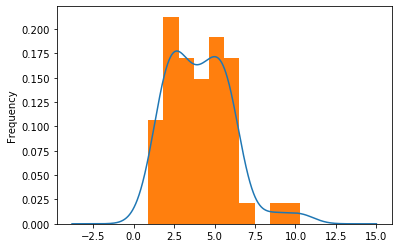

In [46]:
# 커널밀도추정
df_state['Murder.Rate'].plot.kde()
df_state['Murder.Rate'].plot.hist(density=True);

## 1.6 이진 데이터와 범주 데이터 탐색하기
- 최빈값(mode): 데이터에서 가장 자주 등장하는 범주 혹은 값
- 기댓값(expected value): 범주에 해당하는 어떤 수치가 있을 때, 범주의 출현 확률에 따른 평균
- 막대도표(bar chart): 각 범주의 빈도수 혹은 비율을 막대로 나타낸 그림
- 파이그림(pie chart): 각 범주의 빈도수 혹은 비율을 원의 부채꼴 모양으로 나타낸 그림

In [51]:
df_airline = pd.read_csv('psds_data/dfw_airline.csv')

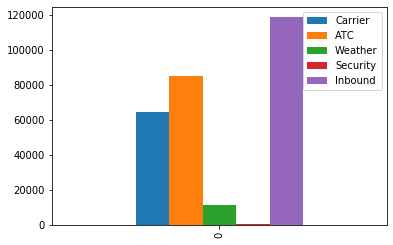

In [53]:
df_airline.plot.bar();

## 1.7 상관관계
- 상관계수(correlation coefficient): 수치적 변수들 간에 어떤 관계가 있는지를 나타내기 위해 사용되는 측정량 (-1에서 +1까지의 범위)
- 상관행렬(correlation matrix): 행과 열이 변수들을 의미하는 표를 말하며, 각 셀은 그 행과 열에 해당하는 변수들 간의 상관관계를 의미한다.
- 산점도(scatterplot): x축과 y축이 서로 다른 두 개의 변수를 나타내는 도표

In [63]:
df_sp500 = pd.read_csv('psds_data/sp500_data.csv', index_col=0)
df_sp500_sym = pd.read_csv('psds_data/sp500_sectors.csv')

In [90]:
# 상관계수
df_etf_corr = df_sp500[df_sp500_sym[df_sp500_sym['sector'] == 'etf']['symbol']]['2012-07-01':].corr()
df_etf_corr

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


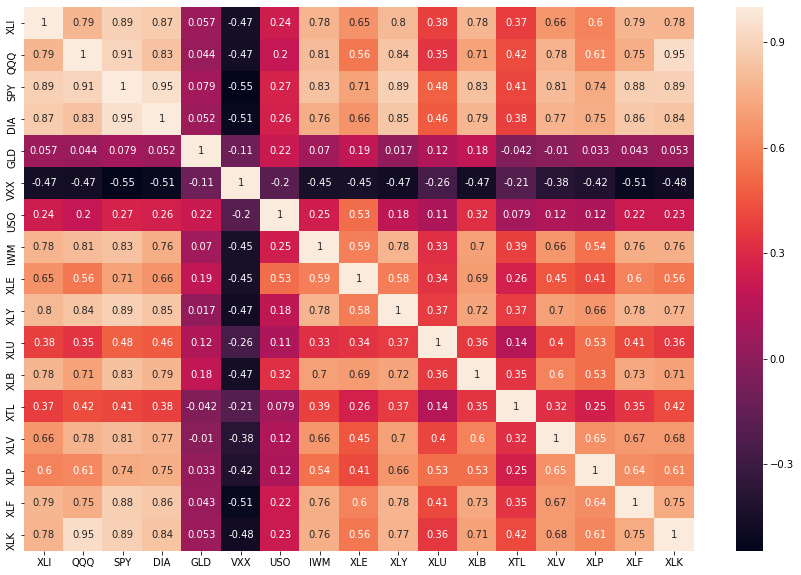

In [80]:
plt.figure(figsize=(15, 10))
sn.heatmap(df_etf_corr, annot=True);

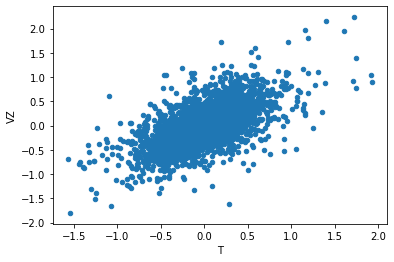

In [89]:
# 산점도
df_sp500[['T', 'VZ']].plot.scatter(x='T', y='VZ');

## 1.8 두 개 이상의 변수 탐색하기
- 분할표(contingency table): 두 가지 이상의 범주형 변수의 빈도수를 기록한 표
- 육각형 구간(hexagonal binning): 두 변수를 육각형 모양의 구간으로 나눈 그림
- 등고 도표(contour plot): 지도상에 같은 높이의 지점을 등고선으로 나타내는 것처럼, 두 변수의 밀도를 등고선으로 표시한 도표
- 바이올린 도표(violin plot): 상자그림과 비슷하지만 밀도추정을 함께 보여준다

In [4]:
df_tax = pd.read_csv('psds_data/kc_tax.csv')

In [9]:
kc_tax0 = df_tax[(df_tax['TaxAssessedValue'] < 750000) & (df_tax['SqFtTotLiving'] > 100) & (df_tax['SqFtTotLiving'] < 3500)]
len(kc_tax0)

432693

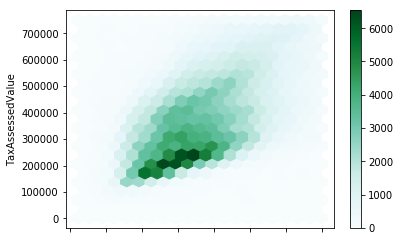

In [31]:
# 육각형 구간
kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=20);

In [16]:
import plotnine as pn

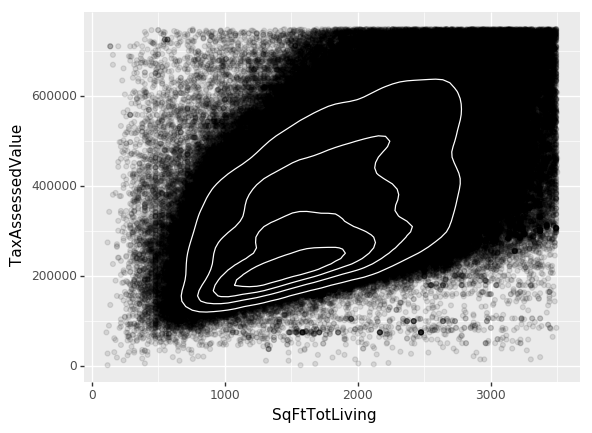

<ggplot: (-9223363261654104362)>

In [30]:
# 등고선 도표
(pn.ggplot(kc_tax0, pn.aes('SqFtTotLiving', 'TaxAssessedValue')) 
 + pn.geom_point(alpha=0.1) 
 + pn.geom_density_2d(colour='white'))

In [33]:
# 분할표
lc_loans = pd.read_csv('psds_data/lc_loans.csv')
pd.crosstab(lc_loans['grade'], lc_loans['status'], margins=True)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961
